In [21]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
import pandas as pd
%matplotlib inline

In [2]:
dtype_dict = {'bathrooms':float, 'waterfront':int, 'sqft_above':int, 'sqft_living15':float, 'grade':int, 'yr_renovated':int, 'price':float, 'bedrooms':float, 'zipcode':str, 'long':float, 'sqft_lot15':float, 'sqft_living':float, 'floors':str, 'condition':int, 'lat':float, 'date':str, 'sqft_basement':int, 'yr_built':int, 'id':str, 'sqft_lot':int, 'view':int}

In [16]:
def polynomial_dataframe(feature, degree): # feature is pandas.Series type
    # assume that degree >= 1
    # initialize the dataframe:
    poly_dataframe = pd.DataFrame()
    # and set poly_dataframe['power_1'] equal to the passed feature
    poly_dataframe['power_1'] = feature
    # first check if degree > 1
    if degree > 1:
        # then loop over the remaining degrees:
        for power in range(2, degree+1):
            # first we'll give the column a name:
            name = 'power_' + str(power)
            # assign poly_dataframe[name] to be feature^power; use apply(*)
            poly_dataframe[name] = feature.apply(lambda x: x**power)
    return poly_dataframe

In [17]:
sales = pd.read_csv('kc_house_data.csv', dtype=dtype_dict)
sales = sales.sort(['sqft_living','price'])

/home/jue/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:2: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  from ipykernel import kernelapp as app


In [18]:
type(sales['sqft_living'])

pandas.core.series.Series

In [34]:
poly1_data = polynomial_dataframe(sales['sqft_living'], 1)
poly1_data['price'] = sales['price']
print len(poly1_data['power_1'])
print len(poly1_data['price'])
print poly1_data['power_1'].shape
print poly1_data['price'].shape
print type(poly1_data)
print type(poly1_data['price'])

21613
21613
(21613,)
(21613,)
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


In [32]:
model1 = linear_model.LinearRegression()
model1.fit(poly1_data['power_1'].reshape(-1,1), poly1_data['price'].reshape(-1,1))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

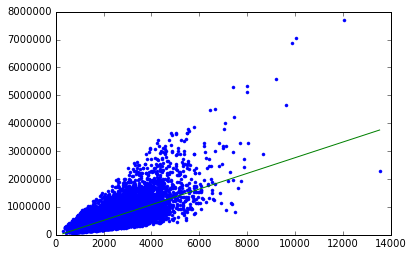

In [40]:
plt.plot(poly1_data['power_1'].reshape(-1,1), poly1_data['price'].reshape(-1,1), '.',
      poly1_data['power_1'].reshape(-1,1), model1.predict(poly1_data['power_1'].reshape(-1,1)), '-')


In [44]:
poly15_data.shape

(21613, 16)

In [54]:
poly15_data = polynomial_dataframe(sales['sqft_living'], 15)
poly15_data['price'] = sales['price']

model15 = linear_model.LinearRegression()
model15.fit(poly15_data.drop('price', axis=1), poly15_data['price'].reshape(-1,1))
print model15.coef_

[[  4.56404164e-91  -6.23779166e-50  -1.30992736e-57   2.48920611e-60
    1.19863929e-74   2.68575522e-71   2.26147568e-67   1.85900299e-63
    1.47144115e-59   1.09771012e-55   7.43509038e-52   4.23015577e-48
    1.61618577e-44  -2.49283826e-48   9.59718336e-53]]


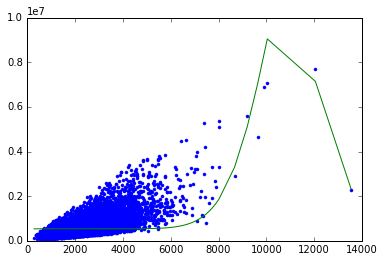

In [57]:
plt.plot(poly1_data['power_1'].reshape(-1,1), poly1_data['price'].reshape(-1,1), '.',
      poly1_data['power_1'].reshape(-1,1), model15.predict(poly15_data.drop('price', axis=1)), '-')

# Part 1

# Set 1

2.18641116408e-52


/home/jue/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:2: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  from ipykernel import kernelapp as app


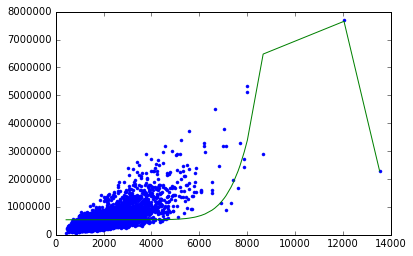

In [67]:
poly15_data1 = pd.read_csv('wk3_kc_house_set_1_data.csv', dtype=dtype_dict)
poly15_data1.sort(['sqft_living', 'price'])
poly15_frame_1 = polynomial_dataframe(poly15_data1['sqft_living'], 15)
poly15_frame_1['price'] = poly15_data1['price']

model15_1 = linear_model.LinearRegression()
model15_1.fit(poly15_frame_1.drop('price', axis=1), poly15_frame_1['price'].reshape(-1, 1))
print model15_1.coef_[0, 14]
plt.plot(poly15_frame_1['power_1'].reshape(-1,1), poly15_frame_1['price'].reshape(-1,1), '.',
      poly15_frame_1['power_1'].reshape(-1,1), model15_1.predict(poly15_frame_1.drop('price', axis=1)), '-')

# Set 2

-1.9650057176e-49


/home/jue/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:2: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  from ipykernel import kernelapp as app


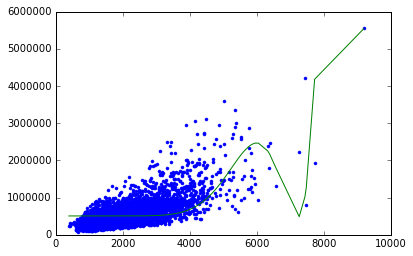

In [68]:
poly15_data2 = pd.read_csv('wk3_kc_house_set_2_data.csv', dtype=dtype_dict)
poly15_data2.sort(['sqft_living', 'price'])
poly15_frame_2 = polynomial_dataframe(poly15_data2['sqft_living'], 15)
poly15_frame_2['price'] = poly15_data2['price']

model15_2 = linear_model.LinearRegression()
model15_2.fit(poly15_frame_2.drop('price', axis=1), poly15_frame_2['price'].reshape(-1, 1))
print model15_2.coef_[0, 14]
plt.plot(poly15_frame_2['power_1'].reshape(-1,1), poly15_frame_2['price'].reshape(-1,1), '.',
      poly15_frame_2['power_1'].reshape(-1,1), model15_2.predict(poly15_frame_2.drop('price', axis=1)), '-')

# Set 3

3.43132932051e-51


/home/jue/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:2: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  from ipykernel import kernelapp as app


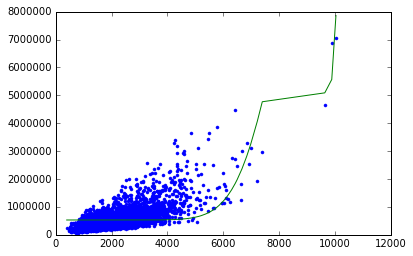

In [69]:
poly15_data3 = pd.read_csv('wk3_kc_house_set_3_data.csv', dtype=dtype_dict)
poly15_data3.sort(['sqft_living', 'price'])
poly15_frame_3 = polynomial_dataframe(poly15_data3['sqft_living'], 15)
poly15_frame_3['price'] = poly15_data3['price']

model15_3 = linear_model.LinearRegression()
model15_3.fit(poly15_frame_3.drop('price', axis=1), poly15_frame_3['price'].reshape(-1, 1))
print model15_3.coef_[0, 14]
plt.plot(poly15_frame_3['power_1'].reshape(-1,1), poly15_frame_3['price'].reshape(-1,1), '.',
      poly15_frame_3['power_1'].reshape(-1,1), model15_3.predict(poly15_frame_3.drop('price', axis=1)), '-')

# Set 4

-6.09072897839e-49


/home/jue/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:2: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  from ipykernel import kernelapp as app


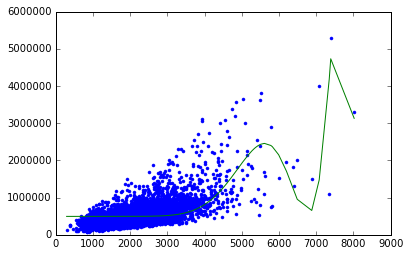

In [70]:
poly15_data4 = pd.read_csv('wk3_kc_house_set_4_data.csv', dtype=dtype_dict)
poly15_data4.sort(['sqft_living', 'price'])
poly15_frame_4 = polynomial_dataframe(poly15_data4['sqft_living'], 15)
poly15_frame_4['price'] = poly15_data4['price']

model15_4 = linear_model.LinearRegression()
model15_4.fit(poly15_frame_4.drop('price', axis=1), poly15_frame_4['price'].reshape(-1, 1))
print model15_4.coef_[0, 14]
plt.plot(poly15_frame_4['power_1'].reshape(-1,1), poly15_frame_4['price'].reshape(-1,1), '.',
      poly15_frame_4['power_1'].reshape(-1,1), model15_4.predict(poly15_frame_4.drop('price', axis=1)), '-')

# Part 2

In [100]:
rss = []
model = []
validate = pd.read_csv('wk3_kc_house_valid_data.csv', dtype=dtype_dict)
validate.sort(['sqft_living', 'price'])
for i in range(1, 16):
    poly_data = polynomial_dataframe(sales['sqft_living'], i)
    validate_data = polynomial_dataframe(validate['sqft_living'], i)
    poly_data['price'] = sales['price']
    validate_data['price'] = validate['price']
    model.append(linear_model.LinearRegression())
    model[i-1].fit(poly_data.drop('price', axis=1), poly_data['price'])
    rss.append(np.sum((model[i-1].predict(validate_data.drop('price', axis=1)) - validate_data['price'])**2))

/home/jue/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:4: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


In [101]:
print rss.index(min(rss))+1
print rss

6
[627447269439335.9, 601538110630382.6, 580521457027702.2, 573142433507413.1, 568936202800456.5, 561769731641212.7, 565281011224642.2, 610097643439495.8, 700919932030742.8, 803327233516292.4, 888054986010853.8, 949575458002180.6, 992694192184851.6, 1095205632252529.9, 1104301401576093.5]


In [102]:
test = pd.read_csv('wk3_kc_house_test_data.csv',dtype=dtype_dict)
degree = rss.index(min(rss))+1
test_data = polynomial_dataframe(test['sqft_living'], degree)
test_data['price'] = test['price']

In [103]:
print np.sum((model[degree-1].predict(test_data.drop('price', axis=1)) - test_data['price'])**2)

1.34737724589e+14
